In [1]:
# basic operations
import numpy as np
import pandas as pd


# for visualizations
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
# import csv file
df = pd.read_csv("UMW_ES_reduced.csv", sep=",")
imdb = pd.read_csv("IMDB_movies_data_clean.csv", sep=",")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19,20,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(df.columns)
print(df.shape)

Index(['Unnamed: 0', 'movie_id', 'rights_holder_id', 'user_id',
       'product_type_id', 'sale_return_id', 'quantity', 'amount_received_eur',
       'royalties_paid_eur', 'comission', 'bundle_quantity',
       'movie_metadata_id', 'date_id', 'date_value', 'user_id.1',
       'business_unit', 'region', 'country_name', 'country_code',
       'postal_code', 'customer_identifier', 'source', 'product_type',
       'video_quality', 'original_title', 'local_title', 'rights_holder_name',
       'expiry_date', 'comission.1', 'mama_movie_id', 'mama_rh_id', 'provider',
       'title', 'artists', 'studio', 'primary_genre', 'version.2', 'cast',
       'genre', 'crew', 'production_year', 'production_company', 'director',
       'original_language', 'length', 'nationality'],
      dtype='object')
(1031005, 46)


In [7]:
df['nationality'].value_counts().count()

58

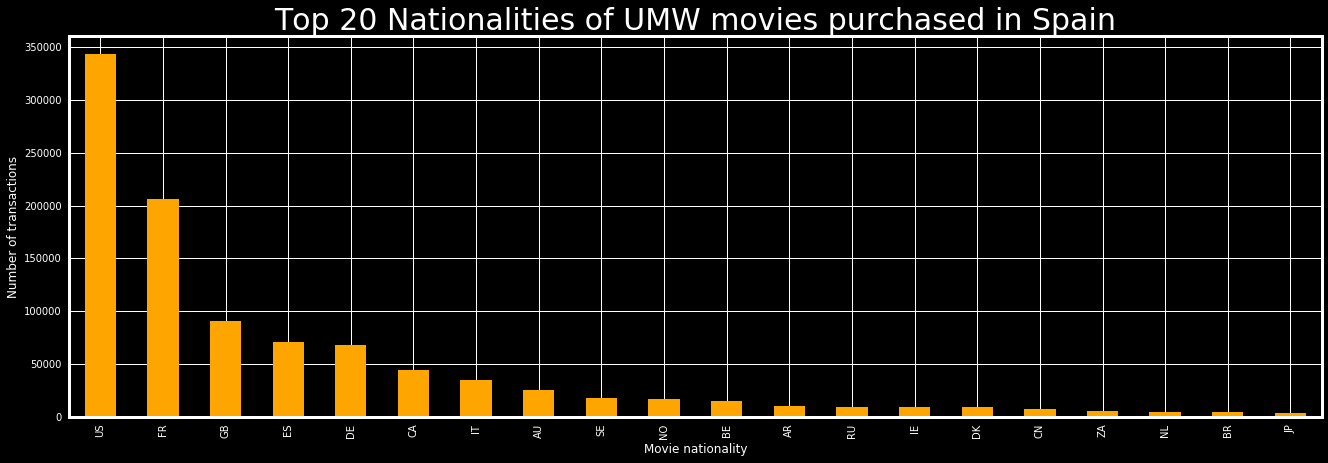

In [8]:
# Top 20 Nationalities of UMW movies released in Spain (Dino, December 2019)

plt.style.use('dark_background')
df['nationality'].value_counts().head(20).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Top 20 Nationalities of UMW movies purchased in Spain', fontsize = 30, fontweight = 20)
plt.xlabel('Movie nationality')
plt.ylabel('Number of transactions')
plt.show()

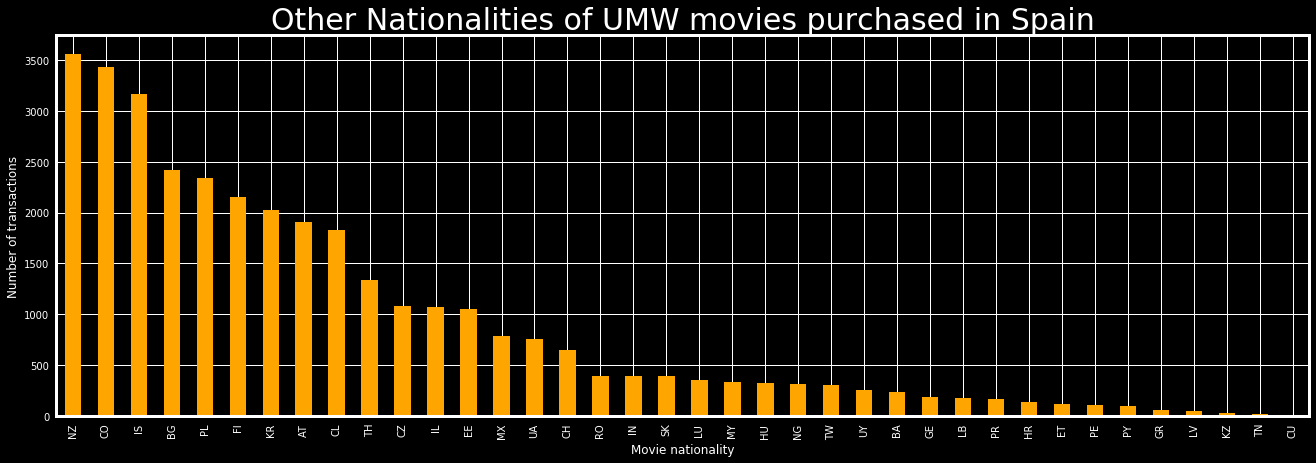

In [9]:
# Other Nationalities of UMW movies released in Spain (Dino, December 2019)

plt.style.use('dark_background')
df['nationality'].value_counts().tail(38).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Other Nationalities of UMW movies purchased in Spain', fontsize = 30, fontweight = 20)
plt.xlabel('Movie nationality')
plt.ylabel('Number of transactions')
plt.show()

In [10]:
df['original_language'].value_counts().count()

45

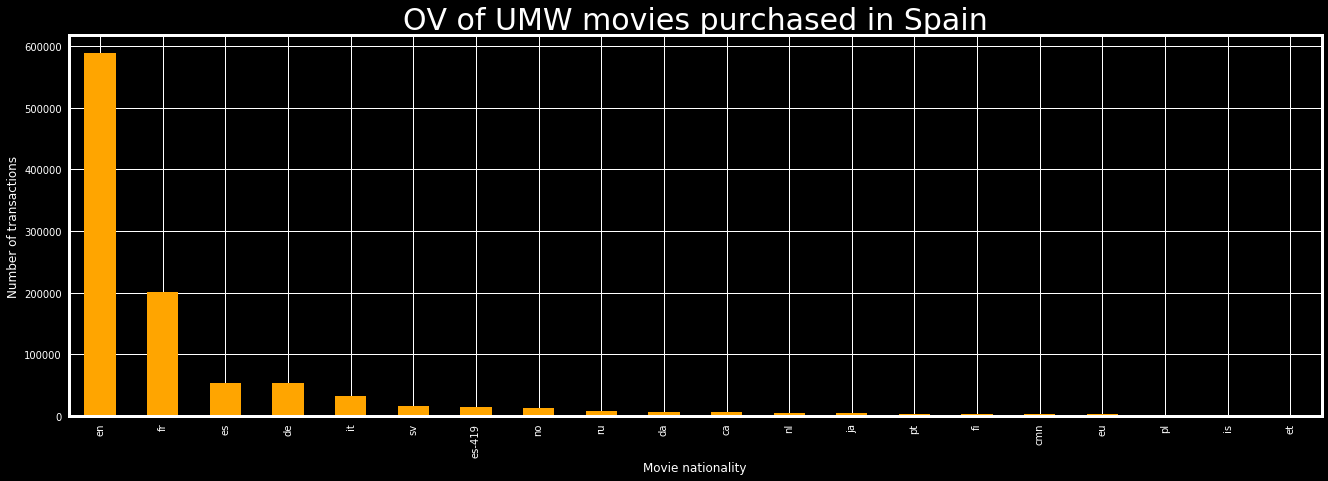

In [15]:
# OV of UMW movies purchased in Spain (Dino, December 2019)

plt.style.use('dark_background')
df['original_language'].value_counts().head(20).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('OV of UMW movies purchased in Spain', fontsize = 30, fontweight = 20)
plt.xlabel('Movie nationality')
plt.ylabel('Number of transactions')
plt.show()

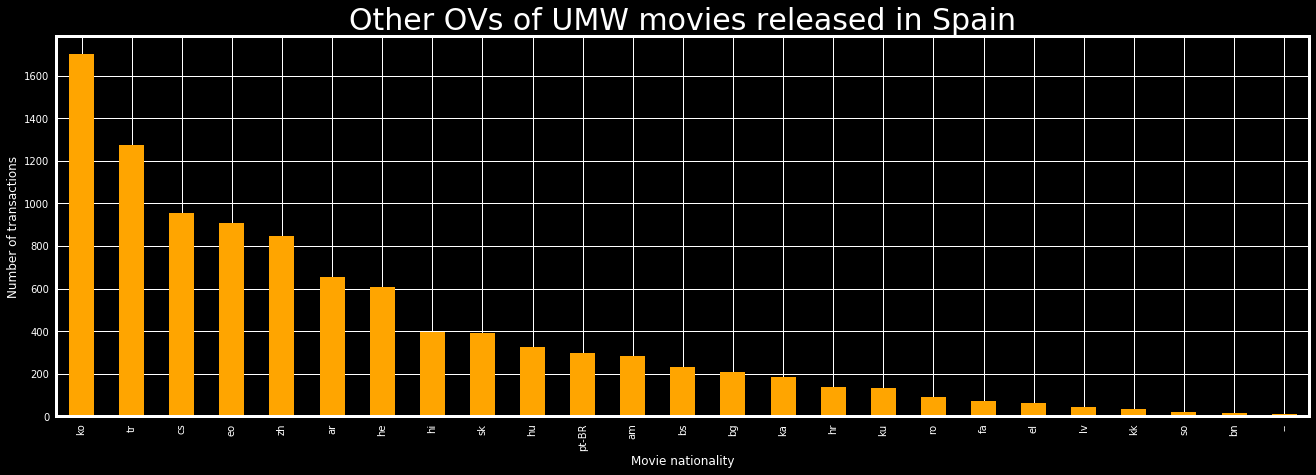

In [16]:
# Other OVs of UMW movies released in Spain (Dino, December 2019)

plt.style.use('dark_background')
df['original_language'].value_counts().tail(25).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Other OVs of UMW movies released in Spain', fontsize = 30, fontweight = 20)
plt.xlabel('Movie nationality')
plt.ylabel('Number of transactions')
plt.show()

In [14]:
df['title'].value_counts().count()

1904

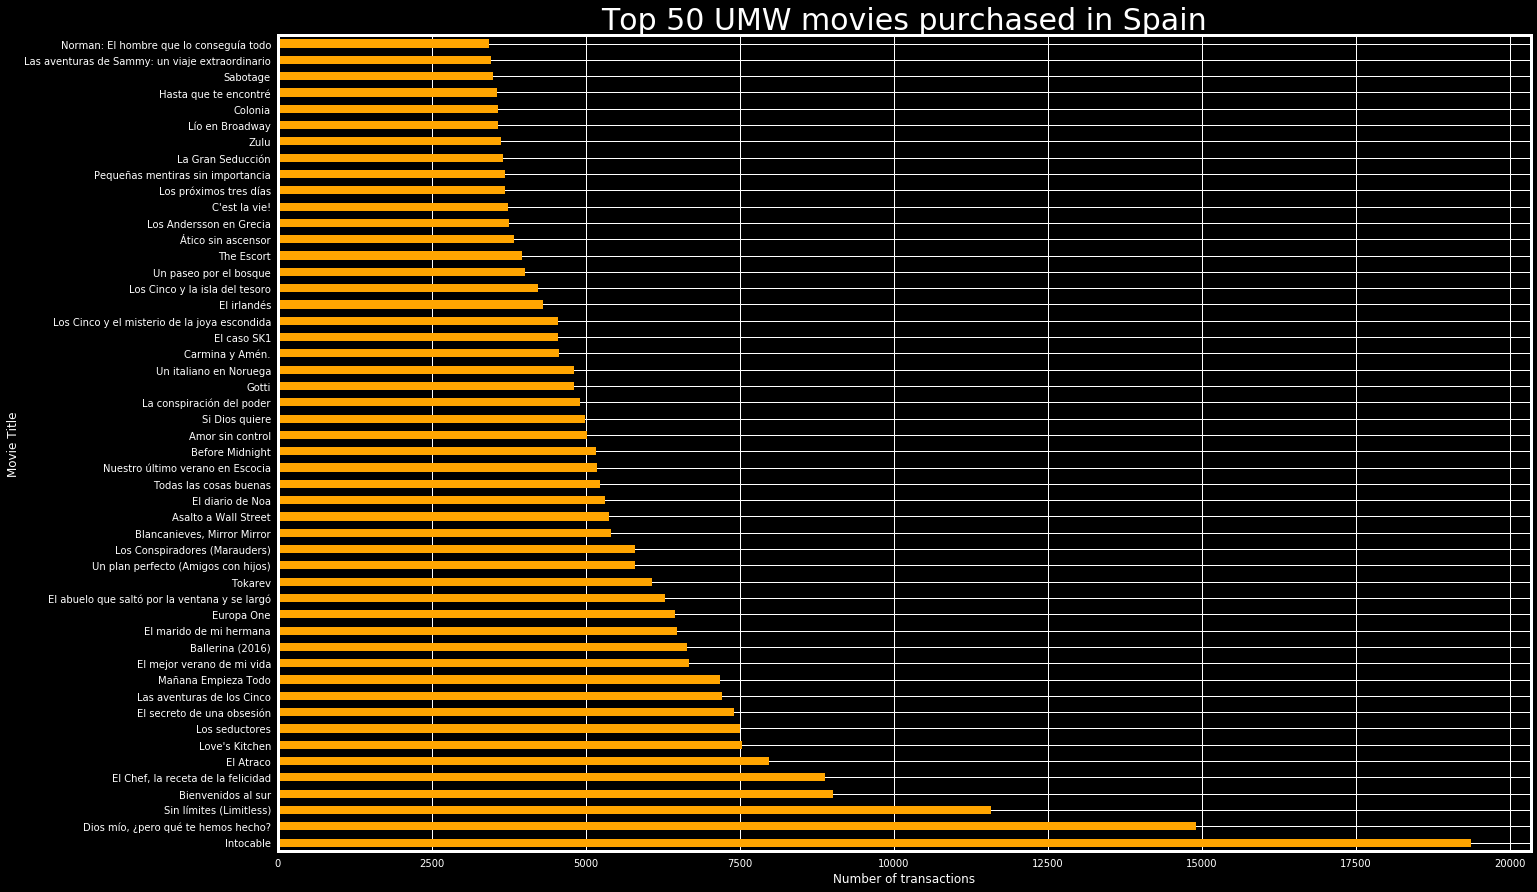

In [19]:
# Top 50 UMW movies purchased in Spain (Dino, December 2019)

plt.style.use('dark_background')
df['title'].value_counts().head(50).plot.barh(color = 'orange', figsize = (20, 15))
plt.title('Top 50 UMW movies purchased in Spain', fontsize = 30, fontweight = 20)
plt.xlabel('Number of transactions')
plt.ylabel('Movie Title')
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


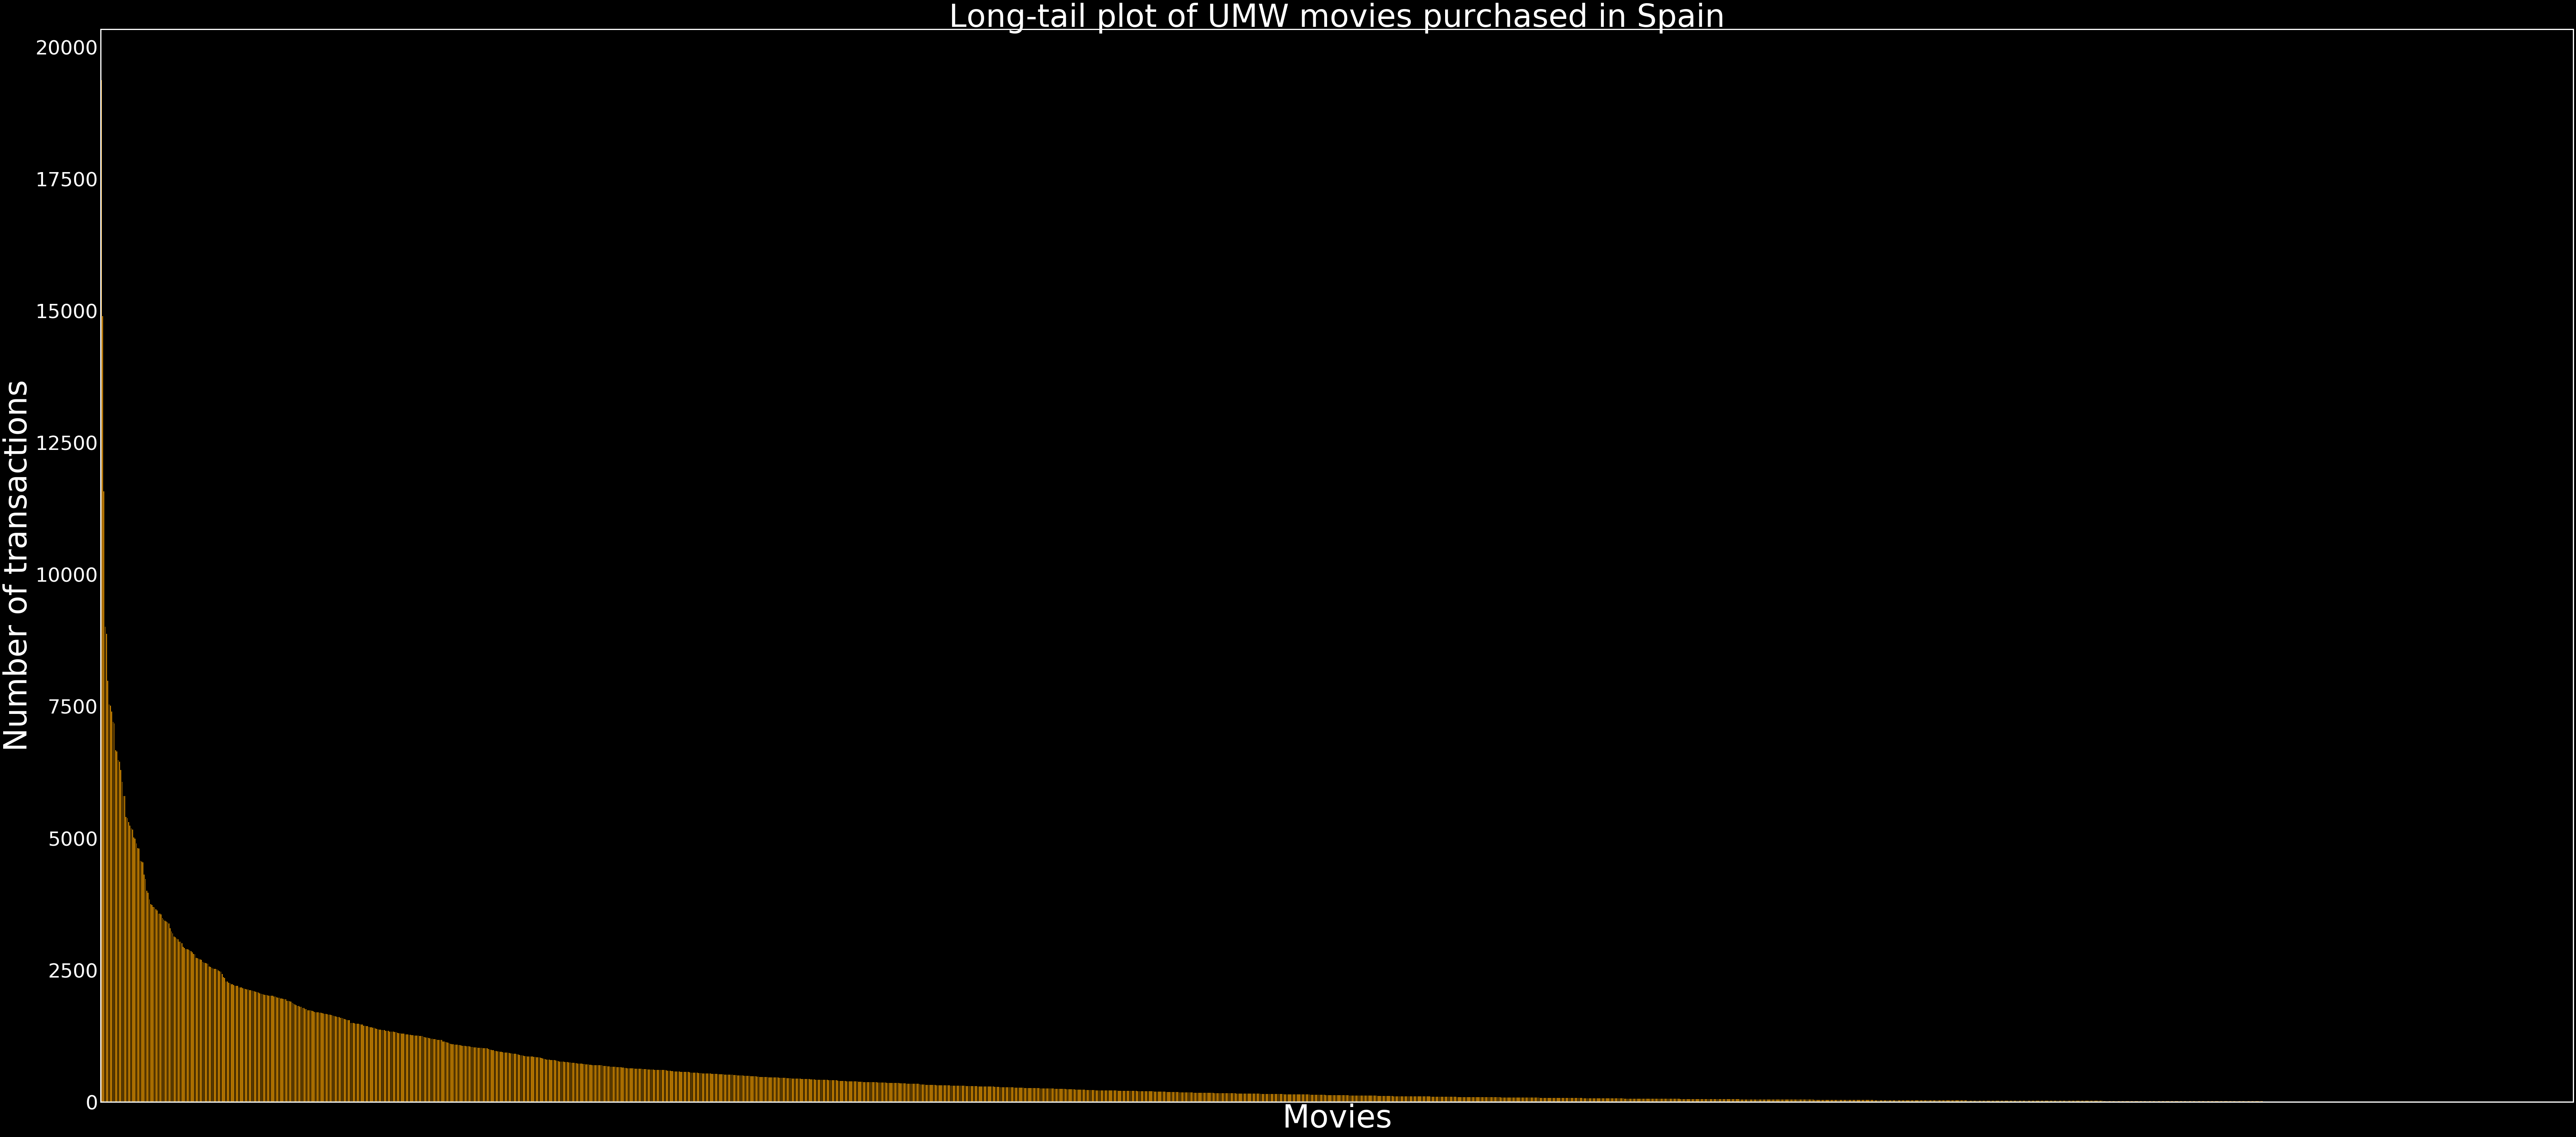

In [20]:
# Long-tail plot of UMW movies purchased in Spain (Dino, December 2019)

plt.style.use('dark_background')
df['title'].value_counts().plot.bar(color = 'orange', figsize = (100,50))
plt.title('Long-tail plot of UMW movies purchased in Spain', fontsize = 80, fontweight = 60)
plt.ylabel('Number of transactions',fontsize= 80, fontweight=60)
plt.xlabel('Movies',fontsize= 80, fontweight=60)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.yticks(fontsize=50)
plt.grid(b=None)
plt.show()

In [21]:
treshold = df['title'].value_counts() > 2000
best_sellers = sum(treshold==True)
print(best_sellers)

133


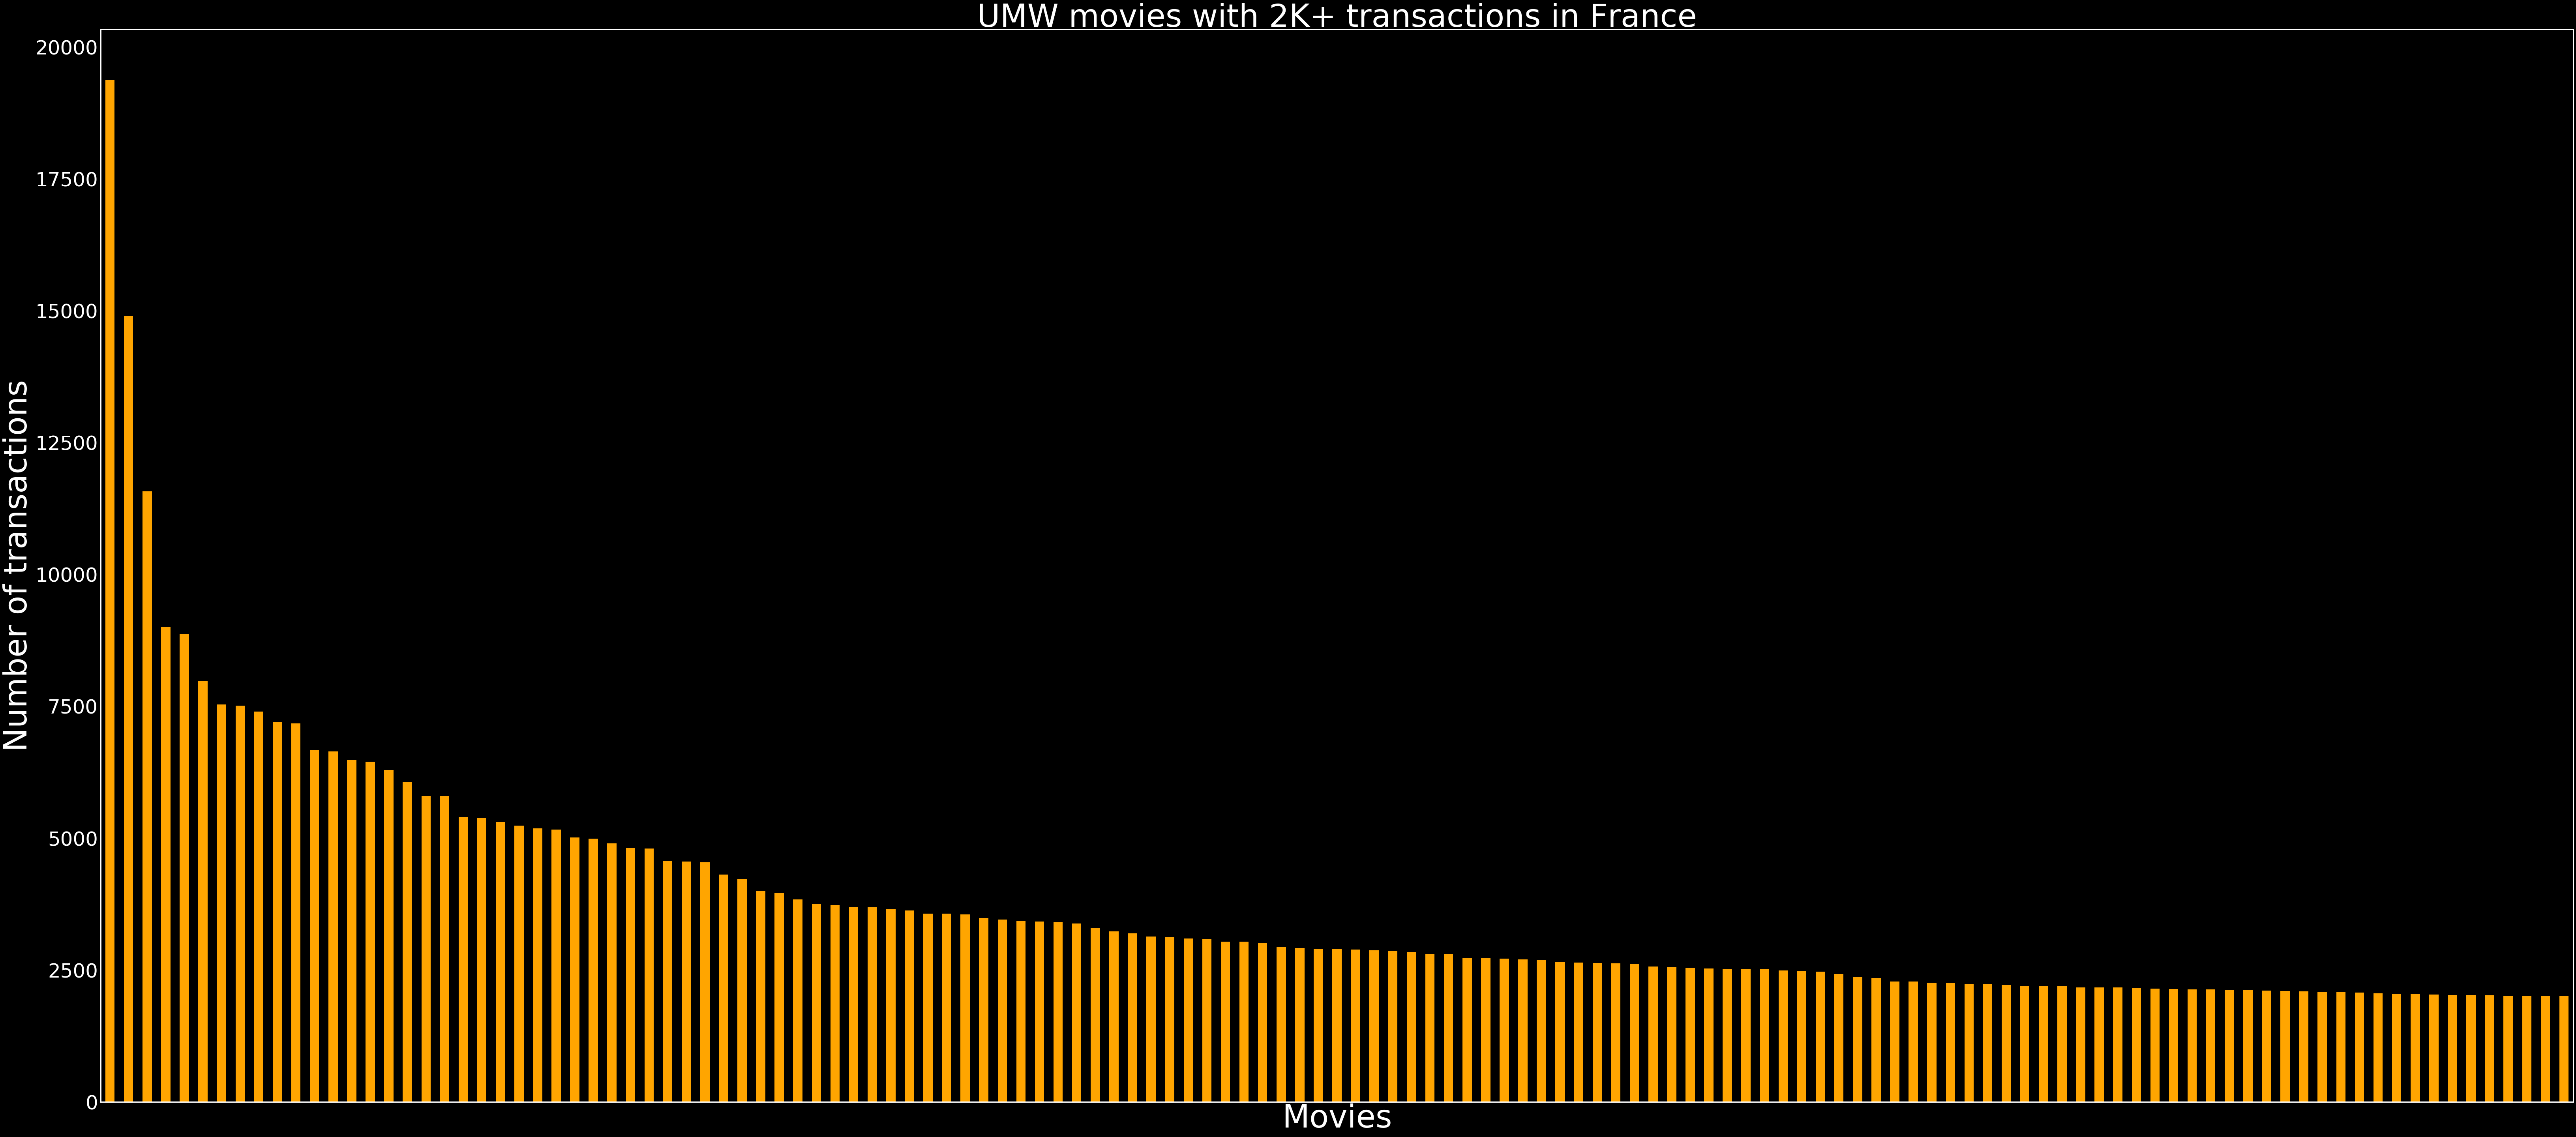

In [22]:
# UMW movies with 2K+ transactions in Spain (Dino, December 2019)

plt.style.use('dark_background')
df['title'].value_counts().head(best_sellers).plot.bar(color = 'orange', figsize = (100,50))
plt.title('UMW movies with 2K+ transactions in Spain', fontsize = 80, fontweight = 60)
plt.ylabel('Number of transactions',fontsize= 80, fontweight=60)
plt.xlabel('Movies',fontsize= 80, fontweight=60)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.yticks(fontsize=50)
plt.grid(b=None)
plt.show()

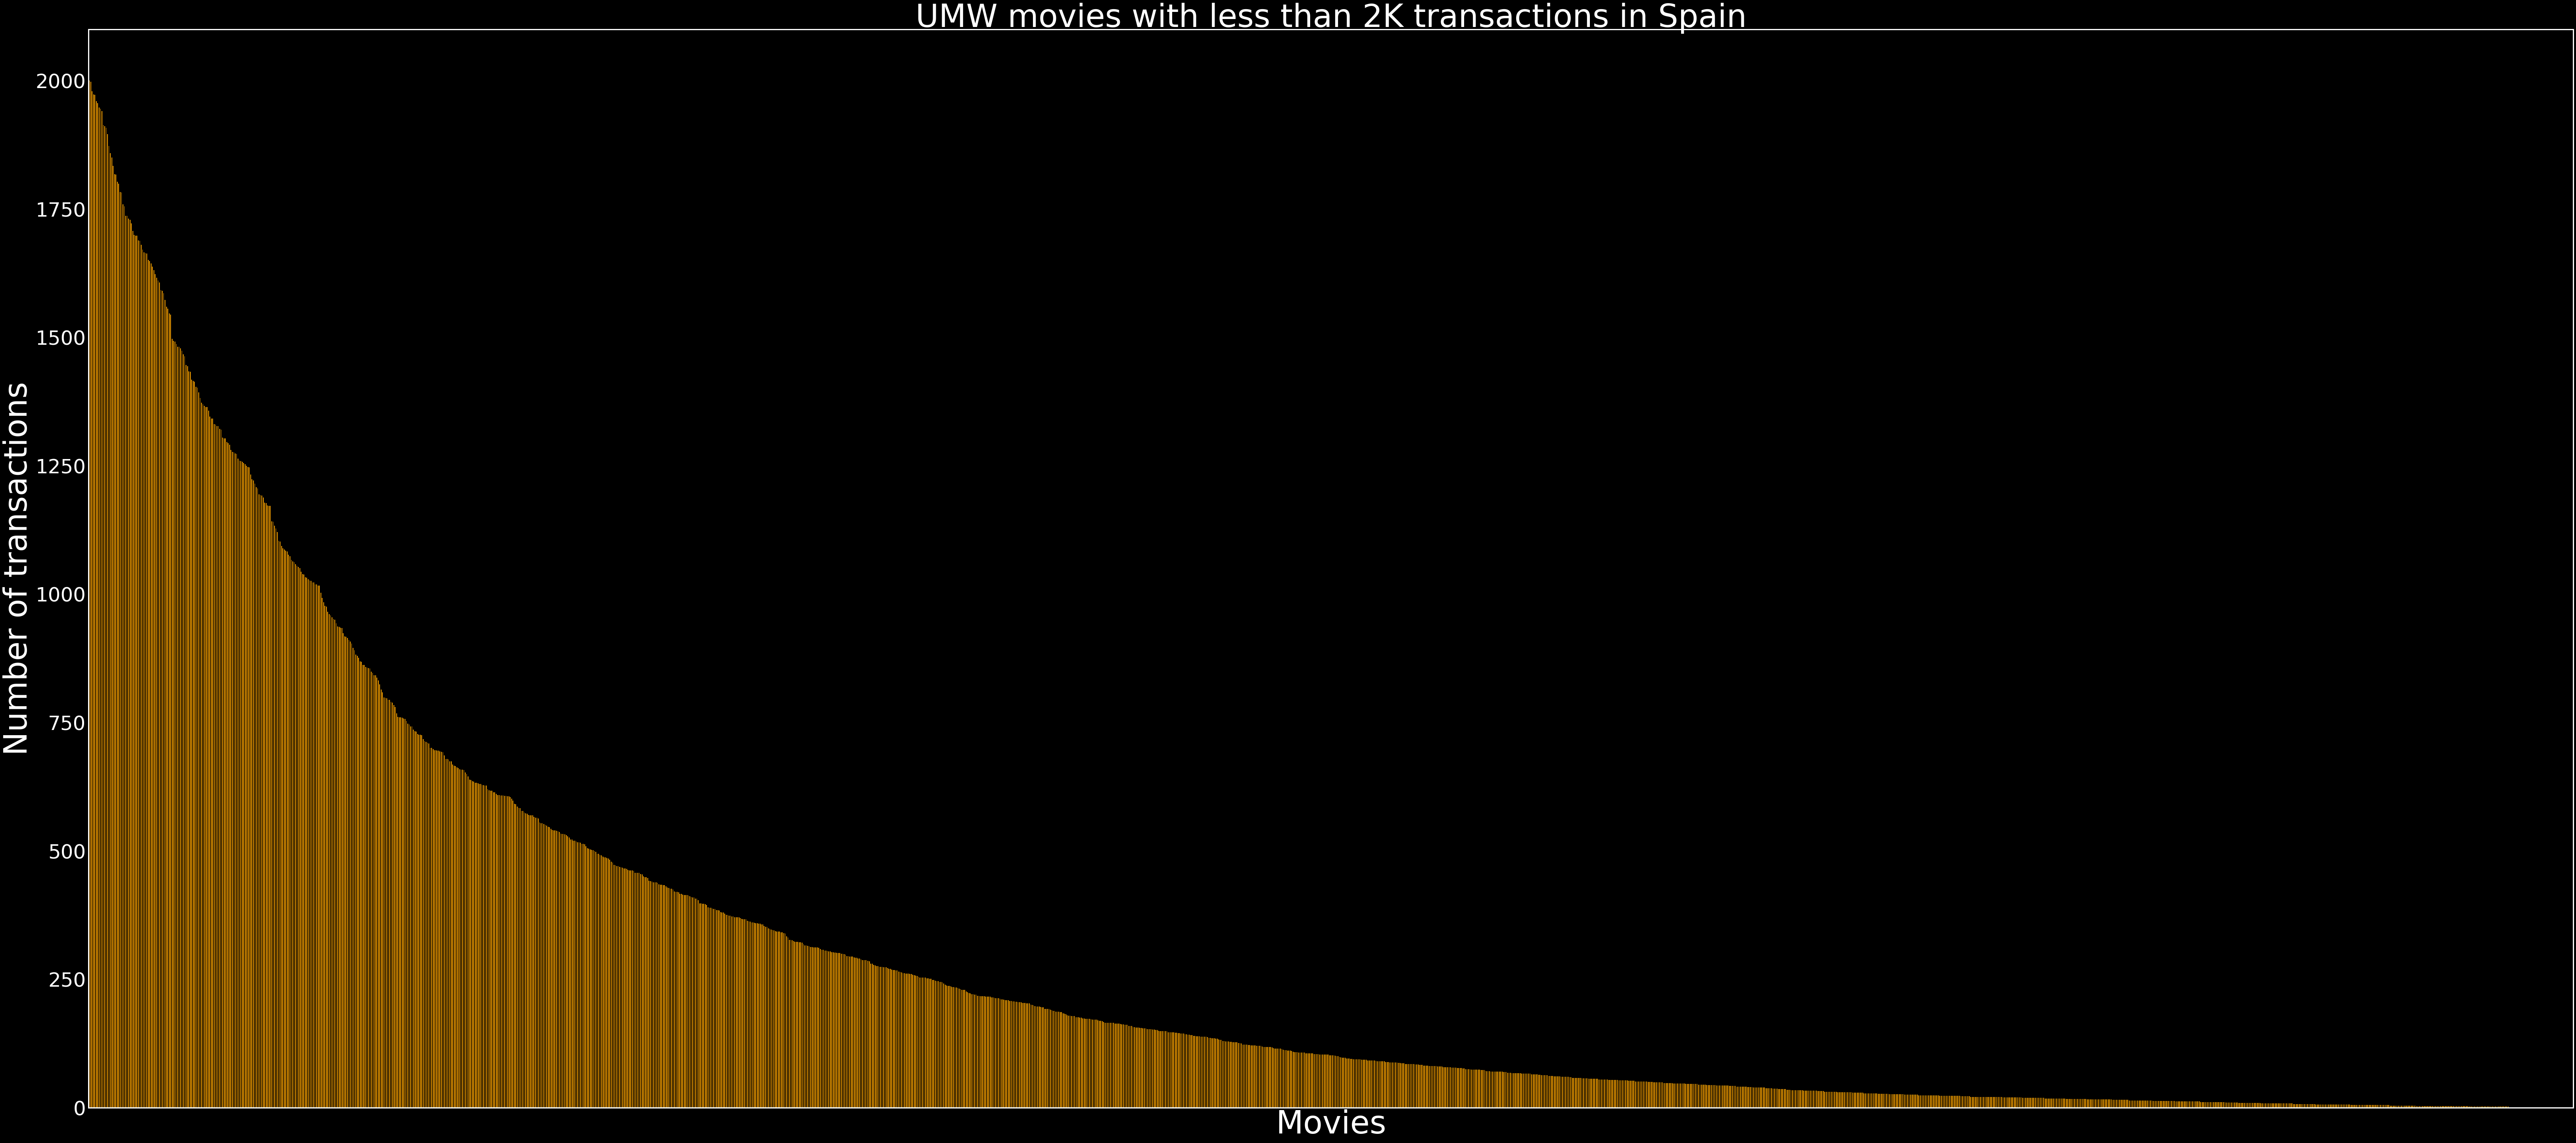

In [23]:
# Other Nationalities of UMW movies released in Spain (Dino, December 2019)

plt.style.use('dark_background')
df['title'].value_counts().tail(len(df['title'].value_counts())-best_sellers).plot.bar(color = 'orange', figsize = (100,50))
plt.title('UMW movies with less than 2K transactions in Spain', fontsize = 80, fontweight = 60)
plt.ylabel('Number of transactions',fontsize= 80, fontweight=60)
plt.xlabel('Movies',fontsize= 80, fontweight=60)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.yticks(fontsize=50)
plt.grid(b=None)
plt.show()

In [24]:
df['total_royalties'] = df.groupby('title')['royalties_paid_eur'].transform('sum')
df.head()
#royalties_sorted = df.sort_values(by=['total_royalties'])
#royalties_sorted.head()

Unnamed: 0  movie_id  rights_holder_id  user_id  product_type_id  \
0           0     12817              4038    51778                1   
1           1     10266              6788    51778                1   
2           2     51184            136174    51778                1   
3           3     12497              4162    51778                1   
4           4     13454             16017    51778                1   

   sale_return_id  quantity  amount_received_eur  royalties_paid_eur  \
0               1         1                 3.99                1.65   
1               1         1                 4.99                2.89   
2               1         1                 4.99                2.74   
3               1         1                 2.99                1.24   
4               1         1                 3.99                2.31   

   comission  ...                                               cast  \
0         22  ...              Claire Foy, Nicolas Cage, Ron Perlman   
1         22  ...  Gérard Lanvin, Nicolas Duvauchelle, Simon Abka...   
2         22  ...  Agnès Jaoui, Pascale Arbillot, Sarah Suco, Thi...   
3         22  ...            James Garner, Ryan Gosling, Sam Shepard   
4         22  ...  Justus Schlingensiepen, Michael Kessler, Neele...   

                                            genre  \
0                              Action & Adventure   
1                    Thriller, Action & Adventure   
2                      Drama, Independent, Comedy   
3                                         Romance   
4  Kids & Family, Action & Adventure, Independent   

                                                crew production_year  \
0                                       Dominic Sena          2011.0   
1  Alexander Emmert, Julien Sibony, Philippe Haïm...          2008.0   
2  Antoine Rein, Blandine Lenoir, Fabrice Goldste...          2017.0   
3                      Jeremy Leven, Nick Cassavetes          2004.0   
4  Andreas Ulmke-Smeaton, Ewa Karlström, Mike Mar...          2013.0   

                 production_company         director original_language length  \
0                  Relativity Media              NaN                en    NaN   
1                            UGC YM    Philippe Haïm                fr  100.0   
2  Karé Productions;France 3 Cinéma  Blandine Lenoir                fr   89.0   
3                   New Line Cinema              NaN                en    NaN   
4                SamFilm Produktion              NaN                de    NaN   

  nationality total_royalties  
0          US         3872.21  
1          FR         6769.52  
2          FR         1066.32  
3          US        10359.88  
4          DE        11713.35  

[5 rows x 47 columns]

In [25]:
royalplot = df[['title','total_royalties']].sort_values('total_royalties', ascending = False)
royalplot = royalplot.drop_duplicates()
royalplot.head()

title  total_royalties
286618                            Intocable         56409.86
90717   Dios mío, ¿pero qué te hemos hecho?         46904.42
784008                     Ballerina (2016)         42877.03
578436                            El Atraco         22142.50
453059   El Chef, la receta de la felicidad         20625.94

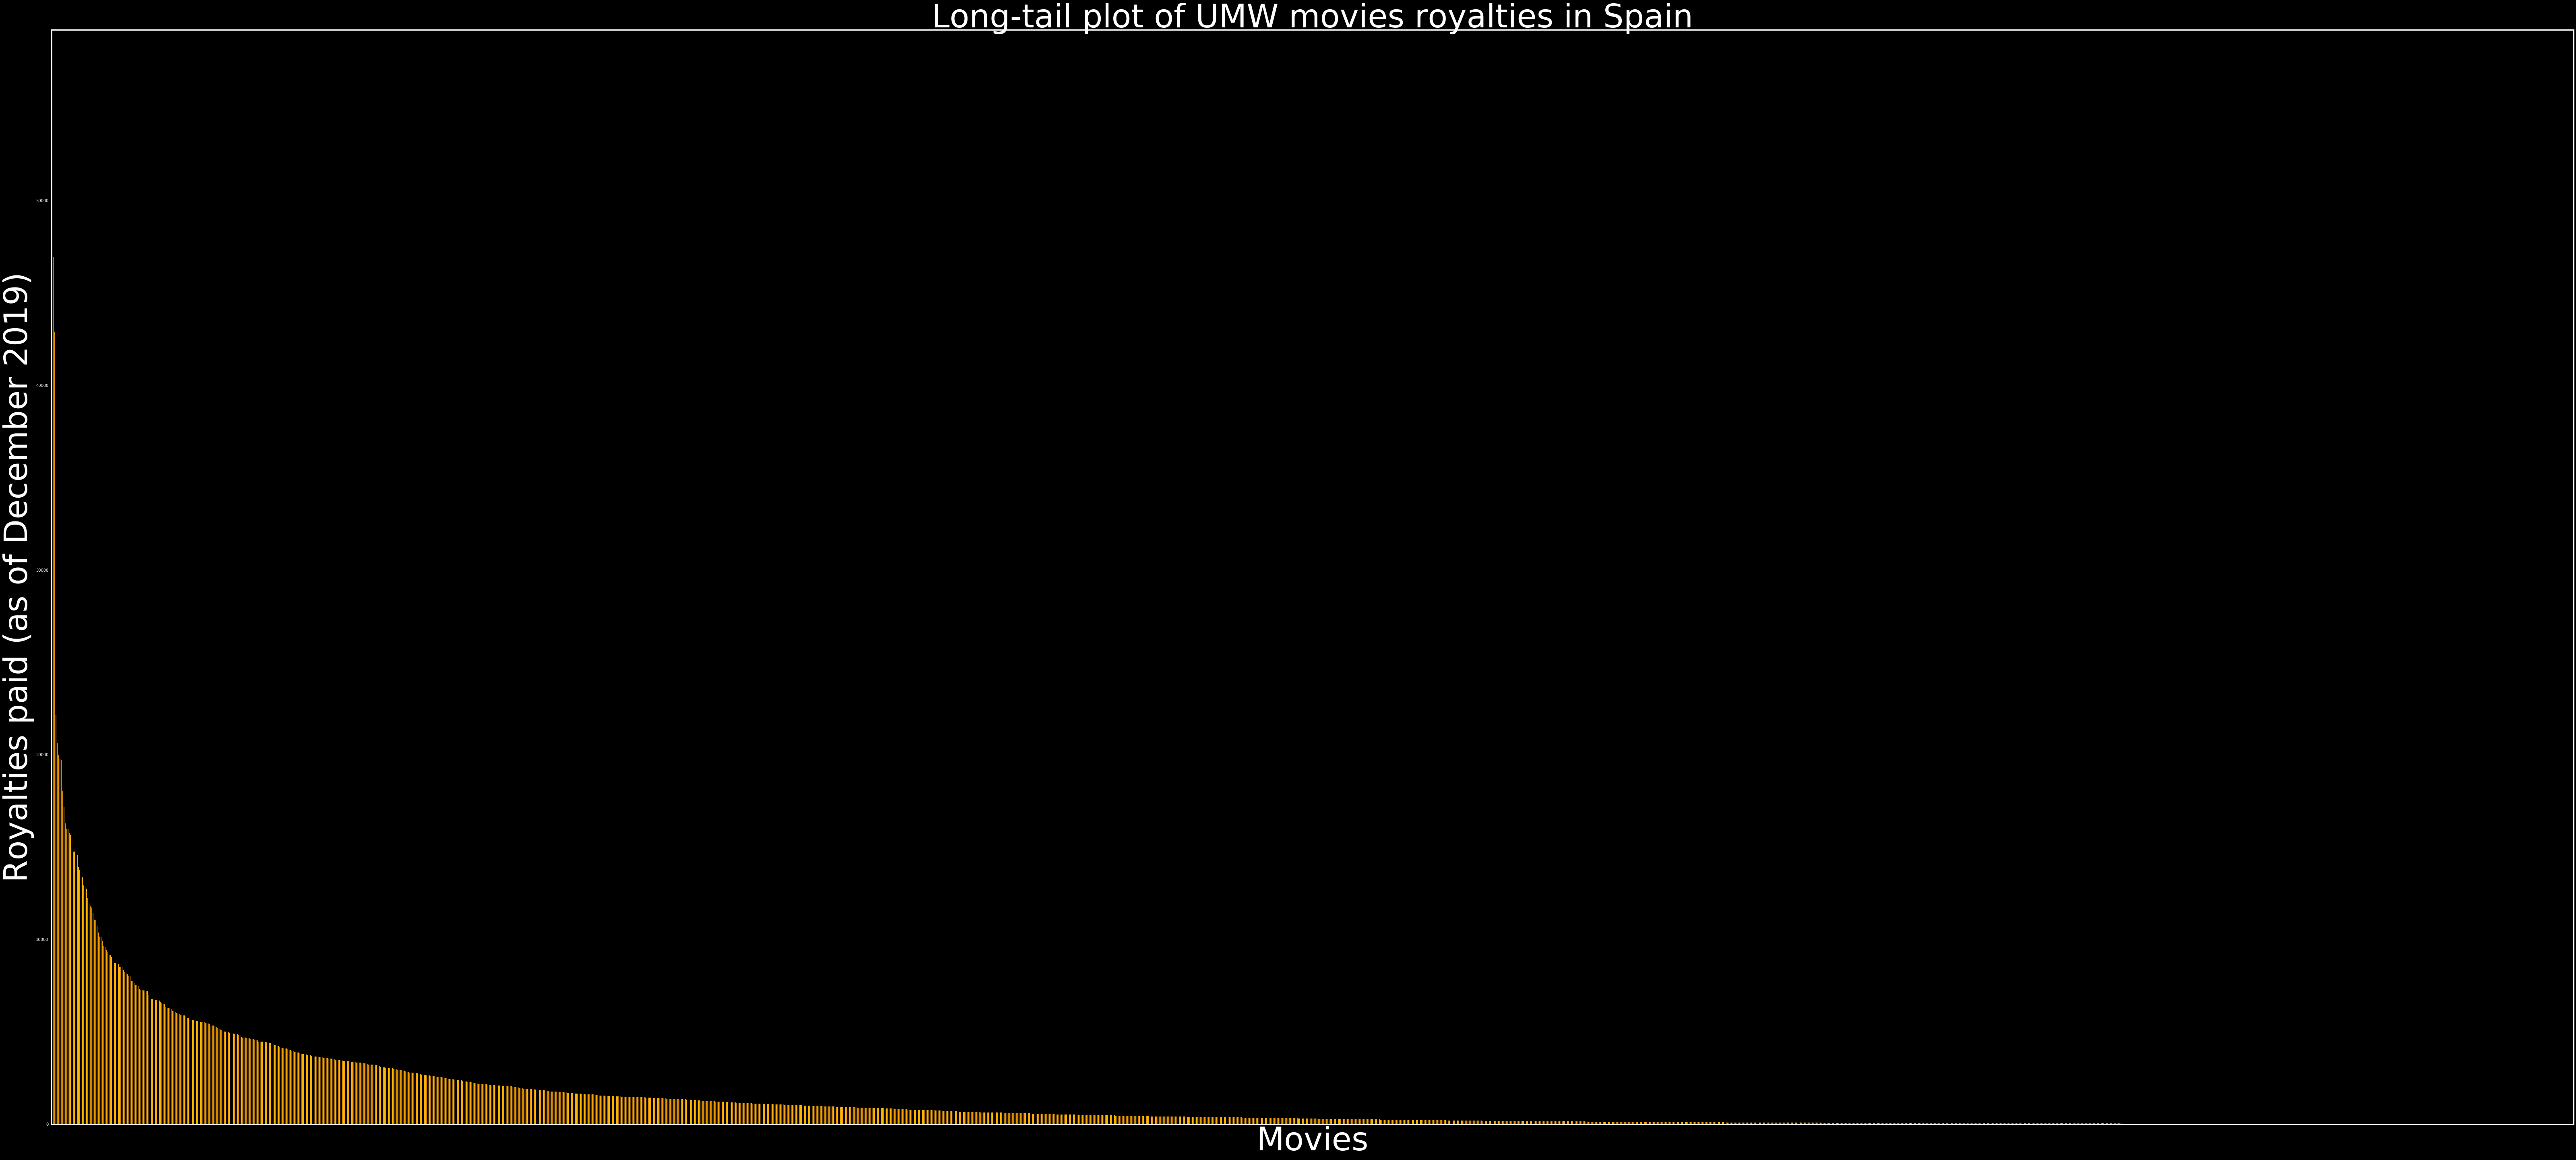

In [28]:
# Long-tail plot of UMW movies royalties in Spain (Dino, December 2019)

plt.style.use('dark_background')
royalplot['total_royalties'].plot.bar(color = 'orange', figsize = (100, 50))
plt.title('Long-tail plot of UMW movies royalties in Spain', fontsize = 80, fontweight = 60)
plt.xlabel('Movies',fontsize= 80, fontweight=60)
plt.ylabel('Royalties paid (as of December 2019)',fontsize= 80, fontweight=60)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.grid(b=None)
plt.show()

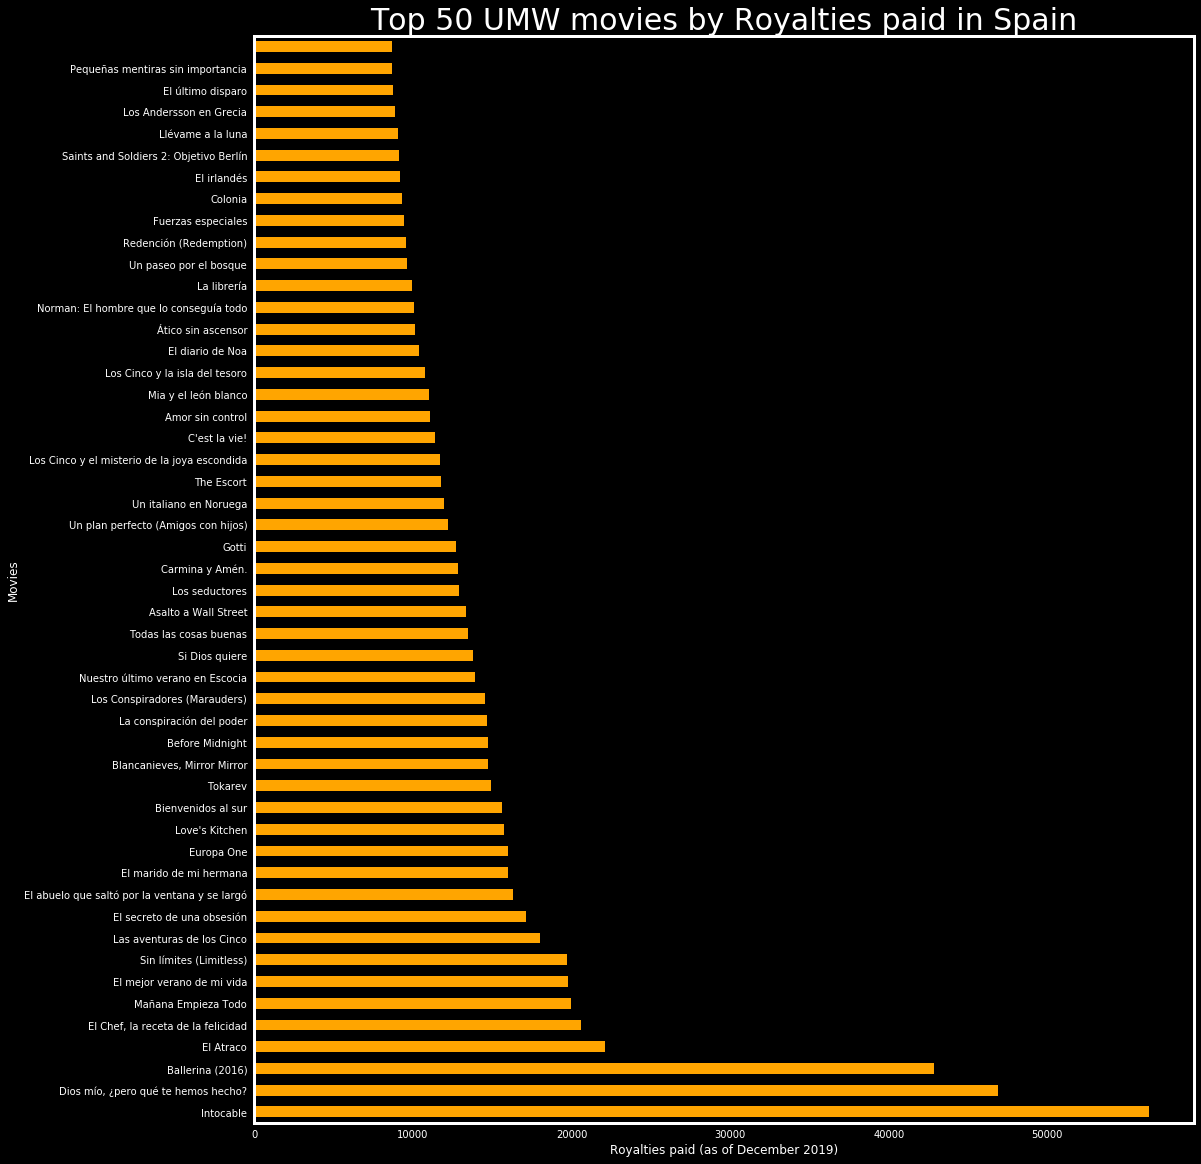

In [29]:
#Top 50 UMW movies by Royalties paid in Spain

plt.style.use('dark_background')
royalplot['total_royalties'].head(50).plot.barh(color = 'orange', figsize = (15, 20))
plt.title('Top 50 UMW movies by Royalties paid in Spain', fontsize = 30, fontweight = 20)
plt.ylabel('Movies')
plt.xlabel('Royalties paid (as of December 2019)')
plt.yticks(np.arange(50),royalplot.title[0:49], rotation=0)
plt.grid(b=None)
plt.show()

In [27]:
print(tags.columns)

Index(['id', 'installation art', 'superheroes', 'Irish conflicts', '1990s',
       'spies', 'psychological abuse', '1930s', 'Qing dynasty', 'in a car',
       ...
       'frenemies', 'hot pursuits', 'live concerts', 'in the skies', 'zombies',
       'climbing', 'American Revolutionary War', 'looking for a parent',
       'bars and restaurants', 'Western United States'],
      dtype='object', length=729)


In [28]:
print(df.movie_id.head)
print(tags.id.head)

<bound method NDFrame.head of 0           12434
1           12440
2           14939
3           13319
4           12505
            ...  
1020162      9586
1020163     12447
1020164    366538
1020165    366538
1020166    366538
Name: movie_id, Length: 1020167, dtype: int64>
<bound method NDFrame.head of 0           1
1           3
2           5
3           7
4           8
        ...  
3303    43262
3304    43263
3305    43373
3306    43415
3307    43548
Name: id, Length: 3308, dtype: int64>


In [29]:
df.isnull().sum()

Unnamed: 0                  0
movie_id                    0
rights_holder_id            0
user_id                     0
product_type_id             0
sale_return_id              0
quantity                    0
amount_received_eur         1
royalties_paid_eur          0
comission                   0
bundle_quantity             0
movie_metadata_id           0
date_id                     0
date_value                  0
user_id.1                   0
business_unit               0
region                      0
country_name                0
country_code                0
postal_code            318720
customer_identifier    318720
source                     36
product_type               36
video_quality             747
original_title             36
local_title                36
rights_holder_name         36
expiry_date               747
comission.1                36
mama_movie_id              36
mama_rh_id               7798
provider                    0
title                       0
artists   

In [30]:
df.fillna('Missing', inplace = True)

In [31]:
df.isnull().sum()

Unnamed: 0             0
movie_id               0
rights_holder_id       0
user_id                0
product_type_id        0
sale_return_id         0
quantity               0
amount_received_eur    0
royalties_paid_eur     0
comission              0
bundle_quantity        0
movie_metadata_id      0
date_id                0
date_value             0
user_id.1              0
business_unit          0
region                 0
country_name           0
country_code           0
postal_code            0
customer_identifier    0
source                 0
product_type           0
video_quality          0
original_title         0
local_title            0
rights_holder_name     0
expiry_date            0
comission.1            0
mama_movie_id          0
mama_rh_id             0
provider               0
title                  0
artists                0
studio                 0
primary_genre          0
version.2              0
cast                   0
genre                  0
crew                   0


In [32]:
imdb_rating = imdb.sort_values(by=['imdbRating'], ascending = False)
imdb_rating['imdbRating'].head(10)

1449    9.4
714     9.2
1595    9.2
229     9.1
1847    9.1
803     9.0
69      8.9
356     8.8
1327    8.8
2518    8.8
Name: imdbRating, dtype: float64

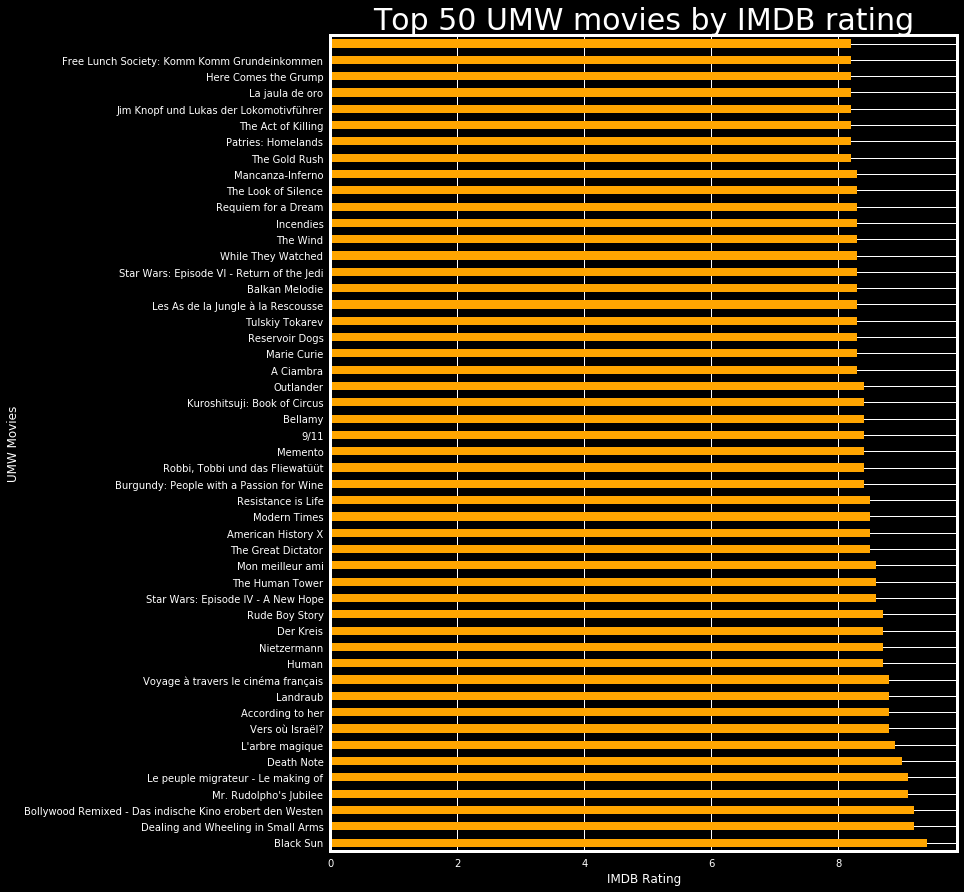

In [33]:
# Top 50 UMW movies by IMDB rating (IMDB, December 2019)

plt.style.use('dark_background')
imdb_rating['imdbRating'].head(50).plot.barh(color = 'orange', figsize = (10, 15))
plt.title('Top 50 UMW movies by IMDB rating', fontsize = 30, fontweight = 20)
plt.yticks(np.arange(50),imdb_rating.Title[0:49], rotation=0)
plt.ylabel('UMW Movies')
plt.xlabel('IMDB Rating')
plt.show()

In [34]:

imdb_boxoffice = imdb.sort_values(by=['BoxOffice'], ascending = False)
imdb_boxoffice['BoxOffice'].head(10)


216     400736600.0
1325    300523113.0
1223    296593070.0
2116    293792936.0
753     292298923.0
684     281267663.0
2001    241250669.0
1899    234300000.0
1409    191449475.0
1016    157801252.0
Name: BoxOffice, dtype: float64

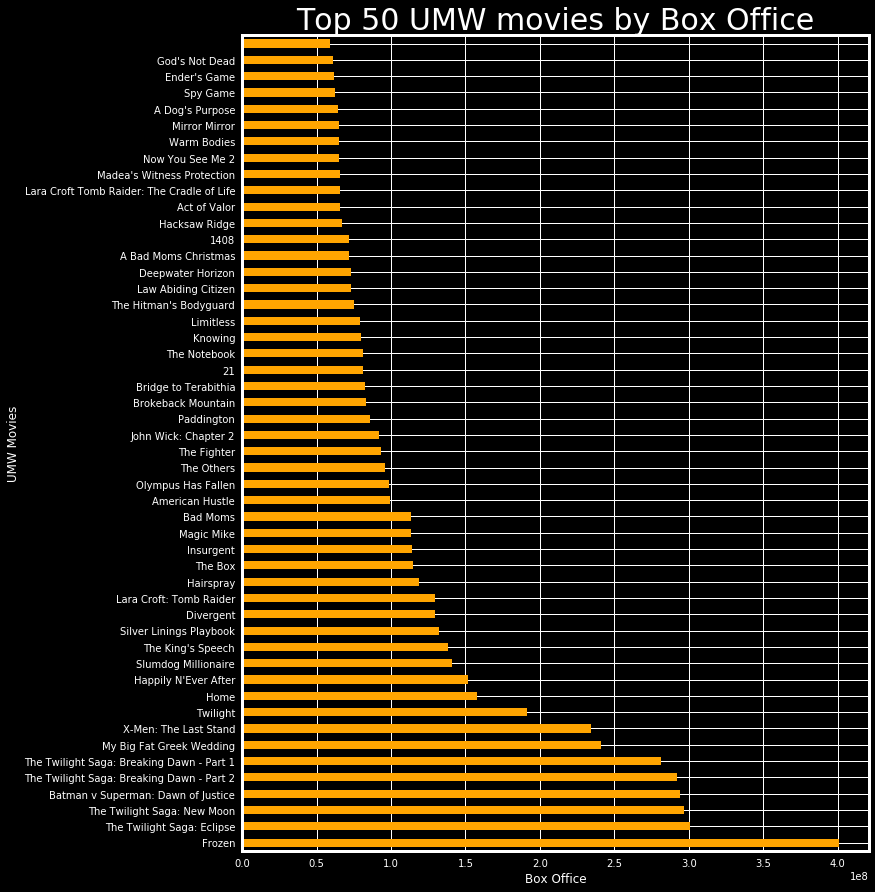

In [44]:
# Top 50 UMW movies by Box Office (IMDB, December 2019)

plt.style.use('dark_background')
imdb_boxoffice['BoxOffice'].head(50).plot.barh(color = 'orange', figsize = (10, 15))
plt.title('Top 50 UMW movies by Box Office', fontsize = 30, fontweight = 20)
plt.yticks(np.arange(50),imdb_boxoffice.Title[0:49], rotation=0)
plt.ylabel('UMW Movies')
plt.xlabel('Box Office')
plt.show()

In [42]:
# Next steps

In [43]:
# Explore effect of actors, awards won, genres and ratings on royalties paid to UMW in France